This notebook presents an MNIST digit classifier built with a fully-connected neural network in TensorFlow and Keras.

## 1. Import Statements

---



In [369]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

%tensorflow_version 2.x
import tensorflow as tf

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


## 2. Data Preprocessing

---



The first step is to preprocess our data. Here, we load the MNIST digit dataset from the Keras datasets library, split it into training and test sets, reshape the matrices, and encode the labels categorically.

In [370]:
# Load the MNIST dataset.
mnist = tf.keras.datasets.mnist
train_data, test_data = mnist.load_data()

In [371]:
# Divide the data into features and labels.
train_images, train_labels = train_data
train_images, validation_images , train_labels , validation_labels = train_test_split(train_images, train_labels, test_size= 10000, random_state=42)
test_images, test_labels = test_data
print(test_images.shape)
print(validation_images.shape)
print(train_labels.shape)

(10000, 28, 28)
(10000, 28, 28)
(50000,)


In [372]:
# Reshape and normalize the images.
X_train = train_images.reshape((50000, 784))
X_train = X_train.astype('float32') / 255
X_validation = validation_images.reshape((10000, 784))
X_validation = X_validation.astype('float32') / 255
X_test = test_images.reshape((10000, 784))
X_test = X_test.astype('float32') / 255

In [373]:
# Reshape the labels and encode them categorically.
y_train = tf.keras.utils.to_categorical(train_labels)
y_validation = tf.keras.utils.to_categorical(validation_labels)
y_test = tf.keras.utils.to_categorical(test_labels)
print(y_train.shape)

(50000, 10)


Further, the following are the shapes of each matrix, as well as a visualization of a random MNIST digit.

In [374]:
# Show the shapes of the data.
print("Training Images:", X_train.shape)
print("Validation Images:", X_validation.shape)
print("Testing Images:", X_test.shape)
print("Training Labels:", y_train.shape)
print("Validation Labels:", y_validation.shape)
print("Test Labels:", y_test.shape)

Training Images: (50000, 784)
Validation Images: (10000, 784)
Testing Images: (10000, 784)
Training Labels: (50000, 10)
Validation Labels: (10000, 10)
Test Labels: (10000, 10)


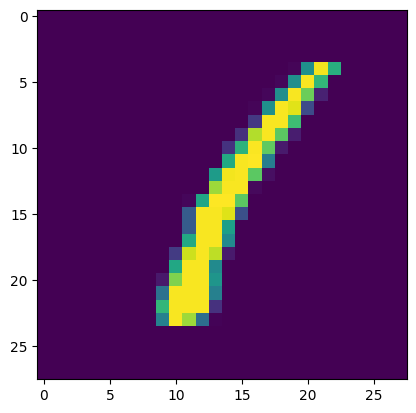

In [375]:
# Show a sample MNIST digit.
plt.imshow(train_images[10])
plt.show()

## 3. Neural Network

---



### 3.1. Define the Model

We then have to define our neural network. Here, we define a sequential model with two fully-connected layers.

In [376]:
# Define the sequential model.
model = tf.keras.models.Sequential()

In [377]:
# Add two fully-connected layers to the network
model.add(tf.keras.layers.Dense(1024, activation='relu', input_shape=(28 * 28,)))
model.add(tf.keras.layers.Dropout(0.4))
# model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dense(10, activation='softmax'))

In [378]:
# Show the model.
model.summary()

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_39 (Dense)            (None, 1024)              803840    
                                                                 
 dropout_8 (Dropout)         (None, 1024)              0         
                                                                 
 dense_40 (Dense)            (None, 10)                10250     
                                                                 
Total params: 814090 (3.11 MB)
Trainable params: 814090 (3.11 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Once our model is defined, we can compile it using the Adam optimizer and the categorical cross-entropy loss function.

In [379]:
# # Compile the model.
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

### 3.2. Train the Model

We then train the model on 10 epochs, using a batch size of 256.

In [380]:
# Define the parameters.
num_epochs = 10
batch_size = 256

# Train the model.
history = model.fit(X_train,
                      y_train,
                      epochs=num_epochs,
                      batch_size=batch_size,
                      validation_data=(X_validation, y_validation))

Epoch 1/10
196/196 [==============================] - 9s 40ms/step - loss: 0.3454 - accuracy: 0.8993 - val_loss: 0.1648 - val_accuracy: 0.9530
Epoch 2/10
196/196 [==============================] - 6s 32ms/step - loss: 0.1523 - accuracy: 0.9562 - val_loss: 0.1131 - val_accuracy: 0.9659
Epoch 3/10
196/196 [==============================] - 9s 46ms/step - loss: 0.1069 - accuracy: 0.9693 - val_loss: 0.0936 - val_accuracy: 0.9728
Epoch 4/10
196/196 [==============================] - 6s 31ms/step - loss: 0.0826 - accuracy: 0.9761 - val_loss: 0.0765 - val_accuracy: 0.9764
Epoch 5/10
196/196 [==============================] - 7s 38ms/step - loss: 0.0674 - accuracy: 0.9799 - val_loss: 0.0773 - val_accuracy: 0.9762
Epoch 6/10
196/196 [==============================] - 6s 31ms/step - loss: 0.0557 - accuracy: 0.9833 - val_loss: 0.0685 - val_accuracy: 0.9790
Epoch 7/10
196/196 [==============================] - 7s 38ms/step - loss: 0.0467 - accuracy: 0.9857 - val_loss: 0.0631 - val_accuracy: 0.9799

### 3.3. Display the Metrics

Finally, we display the metrics. We begin by displaying the model's accuracy and loss based on the test set.

In [381]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print('Test Accuracy:', test_accuracy)
print('Test Loss:', test_loss)

val_loss, val_accuracy = model.evaluate(X_validation, y_validation)
print('Validation Accuracy:', val_accuracy)
print('Validation Loss:', val_loss)

val_loss, val_accuracy = model.evaluate(X_train, y_train)
print('Train Accuracy:', val_accuracy)
print('Train Loss:', val_loss)

313/313 [==============================] - 1s 4ms/step - loss: 0.0570 - accuracy: 0.9817
Test Accuracy: 0.9817000031471252
Test Loss: 0.05697740614414215
313/313 [==============================] - 2s 7ms/step - loss: 0.0586 - accuracy: 0.9817
Validation Accuracy: 0.9817000031471252
Validation Loss: 0.05857020244002342
1563/1563 [==============================] - 6s 4ms/step - loss: 0.0147 - accuracy: 0.9966
Train Accuracy: 0.9965599775314331
Train Loss: 0.01473208237439394


Then, we save the metric values for each epoch to plot the loss and accuracy curves for our model.

In [382]:
# Save the metrics.
metrics = history.history

Finally, once we have our metric history, we can plot the curves.

In [383]:
# Save the loss values.
training_loss_list = metrics['loss']
val_loss_list = metrics['val_loss']

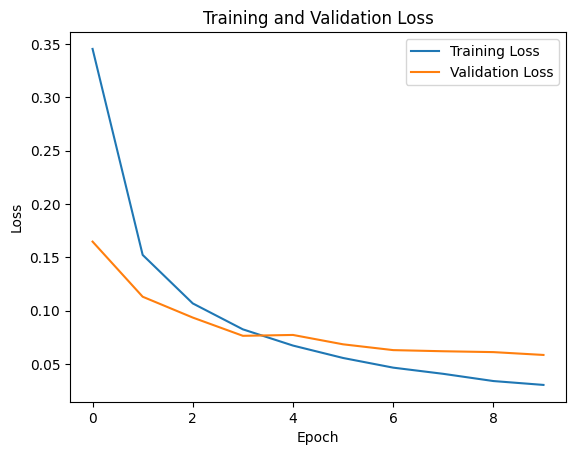

In [384]:
# Plot the training and test loss.
x = np.arange(0, num_epochs, 1)
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.plot(x, training_loss_list, label='Training Loss')
plt.plot(x, val_loss_list, label='Validation Loss')
plt.legend()
plt.show()

In [385]:
train_accuracy_list = metrics['accuracy']
val_accuracy_list = metrics['val_accuracy']

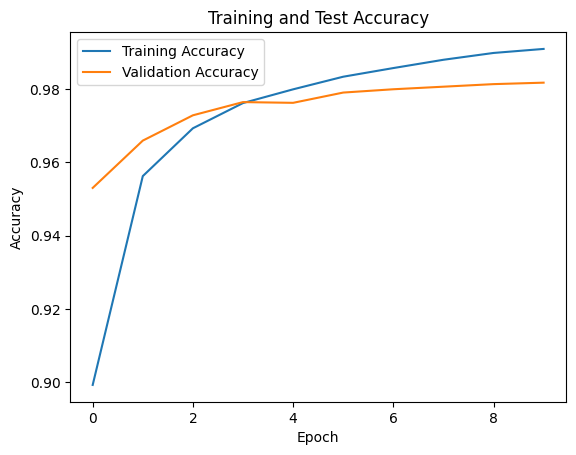

In [386]:
plt.title('Training and Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.plot(x, train_accuracy_list, label='Training Accuracy')
plt.plot(x, val_accuracy_list, label='Validation Accuracy')
plt.legend()
plt.show()

## 4. Make a Prediction

---



Once our model is trained, we can use it to make predictions. To do this, we first use our test set to predict the classes.

In [387]:
# Make predictions with the trained model.
predictions = model.predict(X_test)

313/313 [==============================] - 1s 4ms/step


Finally, we can show a random test image with its corresponding prediction.

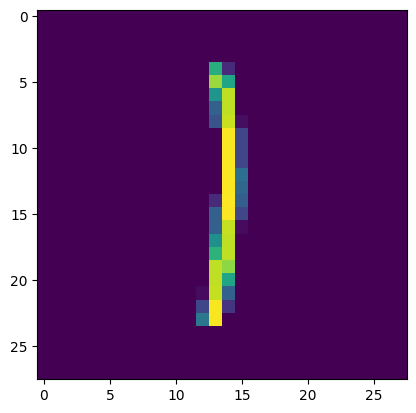

In [388]:
# Choose an index.
index = 40

# Show an image from the test set.
plt.imshow(test_images[index])
plt.show()

In [389]:
print("Prediction:", np.argmax(predictions[index]))

Prediction: 1
